<a href="https://colab.research.google.com/github/sejhig2/Project_mask_healthy/blob/main/makeModel_test_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

메뉴에서 : 런타임 -> 런타임 유형 변경 -> GPU 선택

- 데이터셋을 가져오기 위해 구글 드라이브를 마운트해준다

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

- 훈련을 위해서 yolo v5 를 가져온다

In [ ]:
%cd /content/gdrive/MyDrive/Project_mask/dataset
!git clone https://github.com/ultralytics/yolov5.git

- yolo v5 모델을 사용하기 위해서 패키지를 설치한다. 패키지는 requirement 에 들어있다. 한 방에 설치 가능

In [ ]:
%cd /content/gdrive/MyDrive/Project_mask/dataset/yolov5
!pip install -r requirements.txt

- yaml 파일이 어떻게 구성되어있는지 확인

In [ ]:
%cat "/content/gdrive/MyDrive/Project_mask/dataset/data.yaml"

In [ ]:
from glob import glob
train_img_list = glob("/content/gdrive/MyDrive/Project_mask/dataset/train/images/*")
val_img_list = glob("/content/gdrive/MyDrive/Project_mask/dataset/valid/images/*")
print("훈련 이미지 개수:",len(train_img_list))
print("검증 이미지 개수:",len(val_img_list))

- 훈련 이미지와 검증 이미지의 경로를 파일로 만들어서 저장해두자.

In [ ]:
with open("/content/gdrive/MyDrive/Project_mask/dataset/train.txt","w") as f :
    f.write("\n".join(train_img_list)+"\n")
with open("/content/gdrive/MyDrive/Project_mask/dataset/val.txt","w") as f :
    f.write("\n".join(val_img_list)+"\n")

- yaml 파일 수정이 필요하다

In [ ]:
import yaml

with open("/content/gdrive/MyDrive/Project_mask/dataset/data.yaml", 'r') as f:
  data = yaml.load(f)

print(data)

data['train'] = "/content/gdrive/MyDrive/Project_mask/dataset/train.txt"
data['val'] = "/content/gdrive/MyDrive/Project_mask/dataset/val.txt"

with open("/content/gdrive/MyDrive/Project_mask/dataset/data.yaml", 'w') as f:
  yaml.dump(data, f)

print(data)

- 대망의 모델을 훈련! 

In [ ]:
# f12 눌러서 콘솔창에 아래 코드 입력 후 enter
# 90분 동안 colab에서 아무것도 안 하면 중지되는데 이것을 막아준다.
function ClickConnect(){
    console.log("코랩 연결 끊김 방지"); 
    document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect, 60 * 1000)

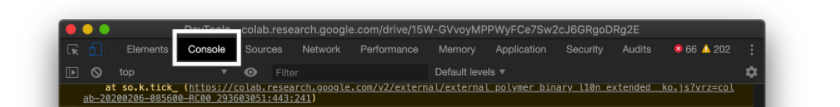

In [ ]:
%cd /content/gdrive/MyDrive/Project_mask/dataset/yolov5

!python train.py --img 416 --batch 16 --epochs 1 --data /content/gdrive/MyDrive/Project_mask/dataset/data.yaml --cfg /content/gdrive/MyDrive/Project_mask/dataset/yolov5/models/yolov5s.yaml --weights yolov5s.pt --name mask_etwa6000__yolov5s_results

- 모델이 어떻게 나왔는지 그래프로 그려서 확인해보자.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/gdrive/MyDrive/Project_mask/dataset/yolov5/runs